In [38]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import matplotlib.pyplot as plt #Import chart builder
import seaborn as sns

data  = pd.read_csv('1msample00.csv')

data['tips'] = data['tips'].dropna(0)
data = data.dropna()

data.head()

,unique_key,taxi_id,trip_start_timestamp,start_hour,start_weekday,start_month,start_quarter,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,tip_status
570,bc9a49806407476ace09668be013d16dea7b9427,a48710b8f311c1332ff9841727e734a4e520cf5cb3c8be...,2013-01-23 12:30:00 UTC,12,4,1,1,2013-01-23 12:45:00 UTC,1080.0,0.6,76.0,14.0,23.25,4.75,0.0,2.0,30.00,Credit Card,Blue Ribbon Taxi Association Inc.,1
571,4e2a893cff322e9b95b72b4424b4a31c4dd6c4f7,f8aaba3ff959b9768365b91e3bd4e7ea430ae6ae8da958...,2013-01-28 21:15:00 UTC,21,2,1,1,2013-01-28 21:30:00 UTC,840.0,2.1,6.0,14.0,10.85,2.15,0.0,0.0,13.00,Credit Card,Northwest Management LLC,1
572,4fcc146be297aefa383161c2f0361f7d1bff57b2,2e275c8a3a332fc30d597b01502fdd0b0dda530836385b...,2013-01-17 23:15:00 UTC,23,5,1,1,2013-01-17 23:30:00 UTC,300.0,0.0,16.0,14.0,5.85,2.00,0.0,0.0,7.85,Credit Card,Taxi Affiliation Services,1
573,bfdf7c28a6f3600c681e5d8b21371770bb325402,20aa7b1d402d36187fbf7760ae603a7edae5ec52ba7ef8...,2013-01-21 02:30:00 UTC,2,2,1,1,2013-01-21 02:45:00 UTC,480.0,0.0,24.0,6.0,9.05,3.00,0.0,0.0,12.05,Credit Card,Dispatch Taxi Affiliation,1
574,b8b3fe4d141b5d713052abbfa9553197981b259d,45edad7ba091c509fcc77bad5cd772bd8eaf202bcedd4d...,2013-01-30 11:45:00 UTC,11,4,1,1,2013-01-30 12:15:00 UTC,1200.0,9.1,28.0,41.0,21.25,5.00,0.0,0.0,26.25,Credit Card,Dispatch Taxi Affiliation,1


In [46]:
#My first intention is to predict whether a driver will get tip or not. However; it turns out that the tips rate is too high, 95%, making it no sense to make any prediction.
data['tip_status'].mean()

0.9537165433559157

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


(array([5.53299426e-02, 1.28002619e-01, 4.08214594e-01, 1.58159726e-01,
        5.72838496e-02, 3.81880270e-02, 2.34360291e-02, 3.31512889e-02,
        2.71267423e-02, 3.38315380e-02, 2.09321334e-02, 7.64194741e-03,
        5.64462025e-03, 2.27232148e-03, 1.42924679e-03, 1.19586346e-03,
        3.16605302e-04, 1.89963181e-04, 9.95045236e-05, 5.97027141e-05]),
 array([ 0.    ,  0.9975,  1.995 ,  2.9925,  3.99  ,  4.9875,  5.985 ,
         6.9825,  7.98  ,  8.9775,  9.975 , 10.9725, 11.97  , 12.9675,
        13.965 , 14.9625, 15.96  , 16.9575, 17.955 , 18.9525, 19.95  ]),
 <a list of 20 Patch objects>)

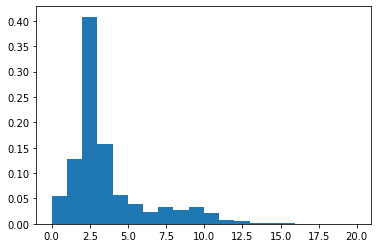

In [47]:
#Let's try to predict if tips pass a certain threshold or not.
#I will look at tips distribution to pick a threshold.
#I only look at tips less than $20 to avoid noises from overly high tips

plt.hist(data[(data['tips'] < 20)]['tips'],bins=20, normed=True)


In [41]:
#Let's see how many trips get a tip larger than $3

data['high_tip'] = (data['tips'] > 3)
data['high_tip'].mean()

# 30%, this is a good group now.

0.30549209194299637

In [54]:
#Amongs the variables, fare and time travels are correlated with tips. The higher the fare or the longer the travel, the more higher the tip can be.
#However, I am not interested in the two, because taxi drivers cannot really decide the such thing.

#Let's look at the pick up and drop off community area instead, they are something a driver can decide, I guess.

xVar = data.iloc[:,10:12]
yVar = data['high_tip']

xVar

,pickup_community_area,dropoff_community_area
570,76.0,14.0
571,6.0,14.0
572,16.0,14.0
573,24.0,6.0
574,28.0,41.0
...,...,...
998720,7.0,22.0
998721,76.0,22.0
998723,32.0,22.0
998733,8.0,22.0


In [56]:
#Splitting training and testing group

X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.3, random_state=1) # 30% training and 70% test


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X_train.unstack()


(388192, 2) (388192,)
(166369, 2) (166369,)


pickup_community_area   629974    28.0
                        525740    32.0
                        739505     6.0
                        985079    76.0
                        74206      6.0
                                  ... 
dropoff_community_area  656881    32.0
                        866146    28.0
                        821102     8.0
                        866642     8.0
                        194072     8.0
Length: 776384, dtype: float64

Accuracy: 0.8595471512120647


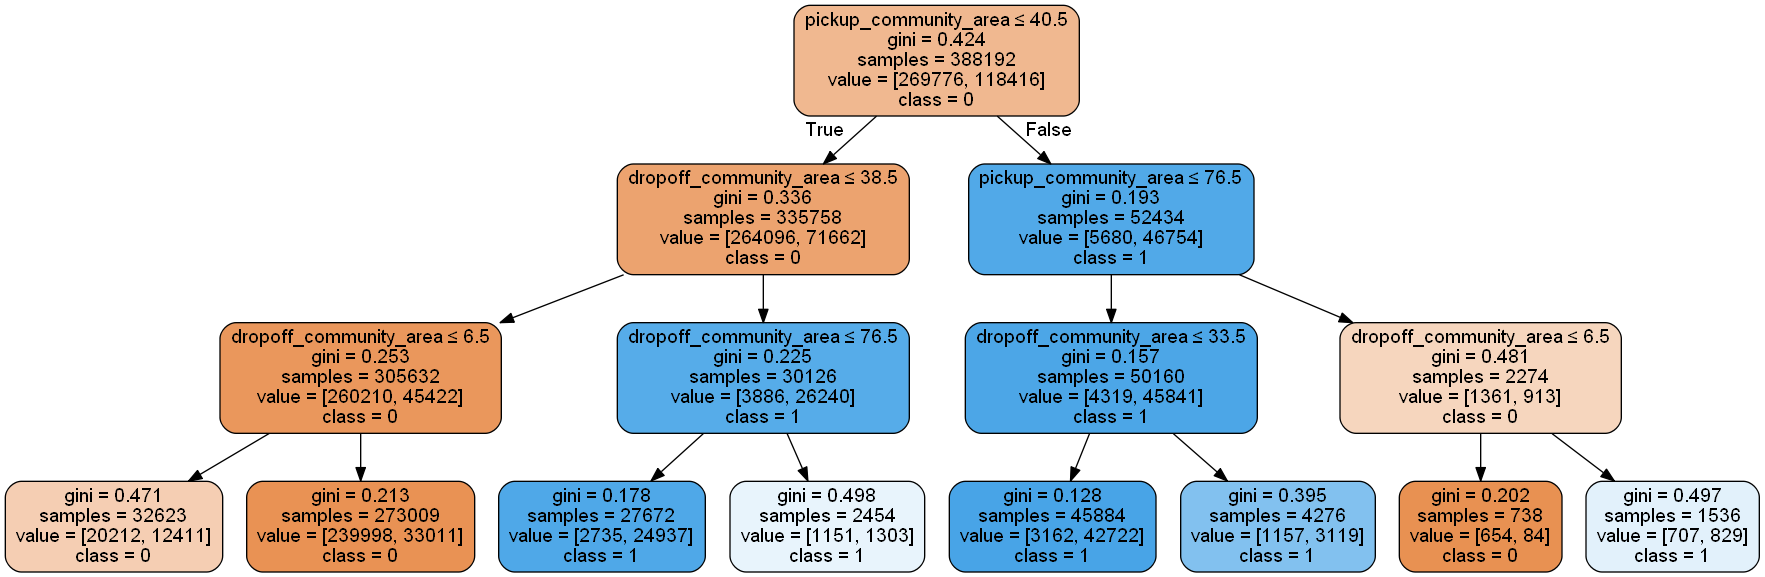

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Install visualization

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = xVar.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tips.png')
Image(graph.create_png())

In [53]:
print('Community Area between 39 to 76 are more likely to leave a $3 tip or more; passensenger drive frome area <= 40 to area between 39 to 76 are as also likely.')

Community Area between 39 to 76 are more likely to leave a $3 tip or more; passensenger drive frome area <= 40 to area between 39 to 76 are as also likely.
